In [1]:
import numpy as np
%matplotlib notebook
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ


<IPython.core.display.Javascript object>


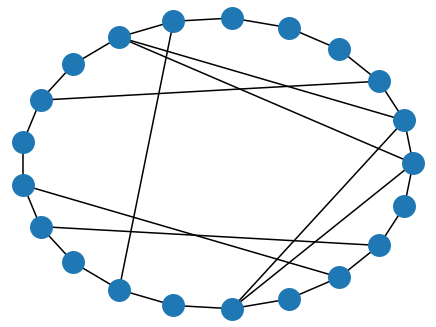

In [2]:
#create a small world network
G = nx.newman_watts_strogatz_graph(21, 3, 0.2)

#set the positions
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

plt.figure(figsize=(4,3))
nx.draw(G, pos=pos, node_size=200)

In [3]:
#create the main object
chi = np.array([ 1.j for i in range(len(G.edges))])
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1')

naq_u1.update_chi(1.) #set the wavenumber 

#update the quantum Laplacian
naq_u1.update_laplacian()
        


<IPython.core.display.Javascript object>


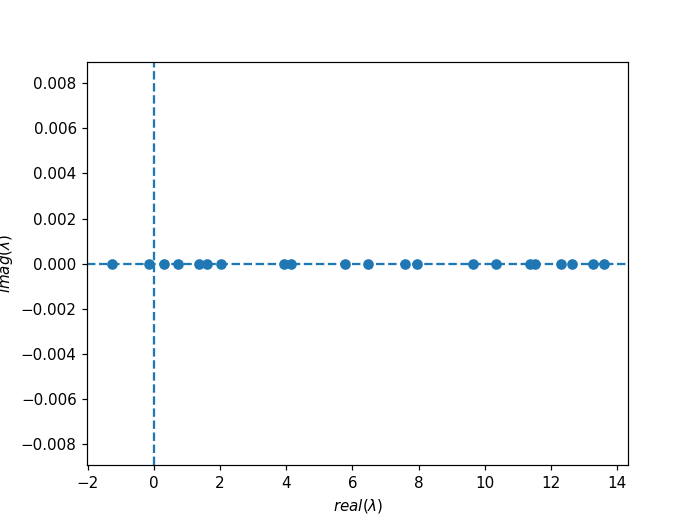

In [4]:
#compute the spectrum
w, v = np.linalg.eig(naq_u1.L0.todense())

plt.figure()
plt.scatter(np.real(w), np.imag(w))
plt.xlabel(r'$real(\lambda)$')
plt.ylabel(r'$imag(\lambda)$')

plt.axvline(0,ls='--')
plt.axhline(0,ls='--')

In [5]:
naq_u1.test_laplacian() #return the singular value/condition number/ smallest eigenvalue

0.14982381

In [6]:
#look for solutions of L(k)x=0, returns a list of valid k_mu

Ks = np.linspace(1.5, 4.5, 20)
k_mu = naq_u1.compute_spectrum_U1(Ks, 7)

In [7]:
#scan wavenumbers to plot the singular value as a function of wavenumber
K = np.linspace(1,5,500)
s = np.zeros(len(K))

for i,k in enumerate(K):
    naq_u1.update_chi(k)
    s[i] = naq_u1.test_laplacian()


<IPython.core.display.Javascript object>


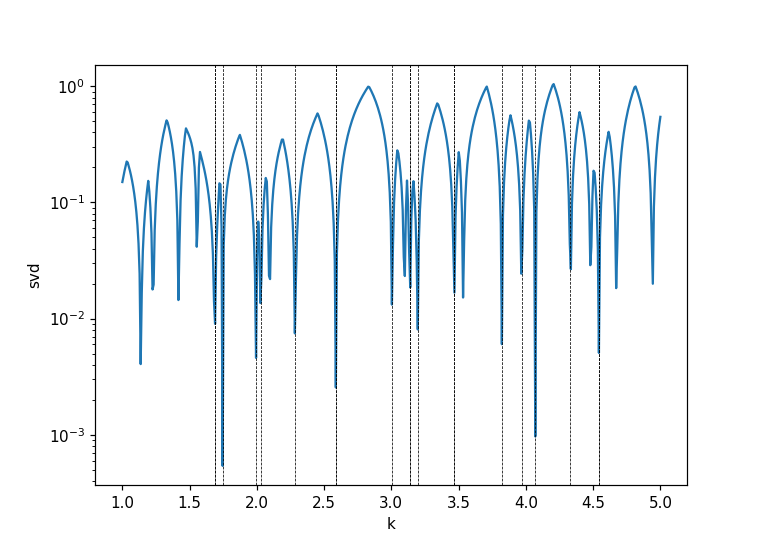

Text(0,0.5,'svd')

In [8]:
plt.figure(figsize=(7,5))
plt.semilogy(K,np.abs(s))
for k in k_mu:
    plt.axvline(k,ls = '--', c='k' , lw=0.5)
    
plt.xlabel('k')
plt.ylabel(naq_u1.cond_type)

<IPython.core.display.Javascript object>


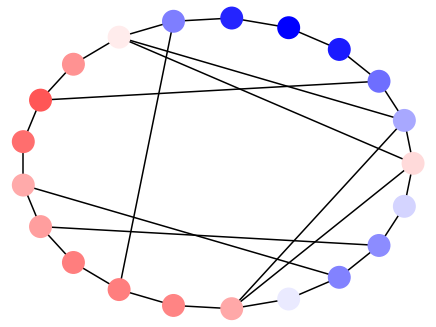

In [10]:
#plot a particular mode in the list k_mu on the graph
mode = 0

naq_u1.update_chi(k_mu[mode])
naq_u1.update_laplacian()
phi = naq_u1.compute_solution()

plt.figure(figsize=(4,3))
nx.draw(G,pos=pos, node_color = np.real(phi),cmap='bwr',node_size=200, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
